In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [2]:
def maj_vote_prob(c, p):
    
    if c%2 != 0:
        i = math.ceil(c / 2)
    else:
        i = int(c/2 + 1)
        
    probability = 0

    for j in range(i, c+1):

        probability += comb(c, j) * math.pow(p, j)*math.pow(1-p, c-j)

    return probability

In [3]:
p_students = maj_vote_prob(31,0.6)
print(f"p(majority medical students) = {p_students}")

p(majority medical students) = 0.8716182723048189


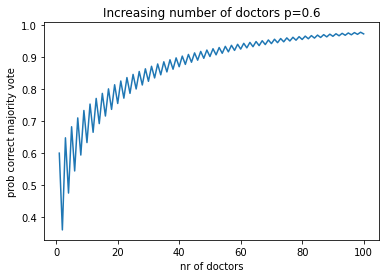

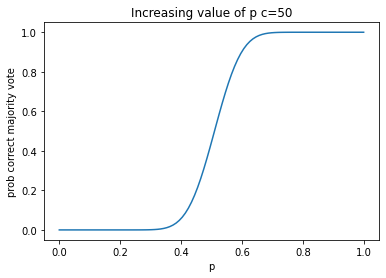

In [9]:
doctors = np.linspace(1,100,100,dtype=np.int)
p = 0.6
prob = [maj_vote_prob(doctor, p) for doctor in doctors]
plt.plot(doctors, prob)
plt.title(f"Increasing number of doctors p={p}")
plt.xlabel("nr of doctors")
plt.ylabel("prob correct majority vote")
plt.show()

ps = np.linspace(0,1,100,dtype=np.float)
doctor = 50
prob = [maj_vote_prob(doctor, p) for p in ps]
plt.plot(ps, prob)
plt.title(f"Increasing value of p c={doctor}")
plt.xlabel("p")
plt.ylabel("prob correct majority vote")
plt.show()

In [47]:
def majority_vote_weighted(probs, weights):
    
    p = np.sum(probs * weights)/np.sum(weights)
    c = len(probs)
    
    return maj_vote_prob(c, p)

In [48]:
probs   = np.array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.75])
weights = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

print(majority_vote_weighted(probs, weights))

0.7827170947774786


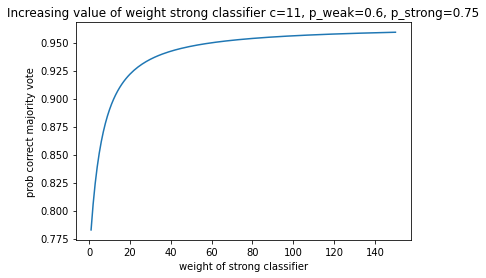

In [55]:
strong_weights = np.linspace(1,150,150,dtype=np.float)
res = []

for w in strong_weights:
    probs   = np.array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.75])
    weights = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, w])
    res.append(majority_vote_weighted(probs, weights))
    
plt.plot(strong_weights, res)
plt.title(f"Increasing value of weight strong classifier c={len(probs)}, p_weak={probs[0]}, p_strong={probs[-1]}")
plt.xlabel("weight of strong classifier")
plt.ylabel("prob correct majority vote")
plt.show()